<center style="font-size: 30px;">Lab3</center>

In [6]:
import random
import matplotlib.pyplot as plt

In [7]:
vertices = [(0, 0), 
            (1, 4), 
            (4, 4), 
            (4, 0), 
            (3, 0), 
            (3, 2), 
            (1, 2), 
            (1, 0), 
            (0, 0)]


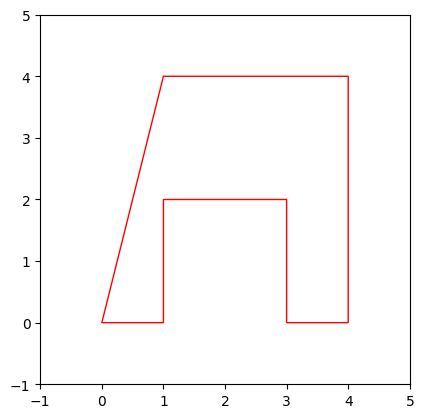

In [8]:
plt.figure()
polygon = plt.Polygon(vertices, fill=None, edgecolor='r')
plt.gca().add_patch(polygon)
plt.xlim(min([v[0] for v in vertices]) - 1, max([v[0] for v in vertices]) + 1)
plt.ylim(min([v[1] for v in vertices]) - 1, max([v[1] for v in vertices]) + 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [9]:
def is_inside_polygon(x, y, vertices):
    inside = False
    for i in range(len(vertices) - 1):
        x1, y1 = vertices[i]
        x2, y2 = vertices[i + 1]
        if (y1 > y) != (y2 > y) and x < (x2 - x1) * (y - y1) / (y2 - y1) + x1:
            inside = not inside
    return inside


def monte_carlo_area(vertices, num_points):
    x_min, x_max = min(v[0] for v in vertices), max(v[0] for v in vertices)
    y_min, y_max = min(v[1] for v in vertices), max(v[1] for v in vertices)

    count_inside = sum(is_inside_polygon(random.uniform(x_min, x_max), random.uniform(y_min, y_max), vertices) for _ in range(num_points))
    return (x_max - x_min) * (y_max - y_min) * (count_inside / num_points)


def exact_polygon_area(vertices):
    return abs(sum(vertices[i][0] * vertices[i + 1][1] - vertices[i + 1][0] * vertices[i][1] for i in range(len(vertices) - 1))) / 2

In [18]:
num_points = 10000
monte_carlo_result = monte_carlo_area(vertices, num_points)
exact_area = exact_polygon_area(vertices)

print(f"Оцінена площа (метод Монте-Карло): {monte_carlo_result}")
print(f"Точна площа фігури: {exact_area}")

Оцінена площа (метод Монте-Карло): 9.9504
Точна площа фігури: 10.0
